<a href="https://colab.research.google.com/github/ThomasKarabo/Python-Data-Science/blob/main/Project_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 24.9MB/s]
100% 163M/163M [00:08<00:00, 20.7MB/s]


In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("Dataset Exctracted successfully")

Dataset Exctracted successfully


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_2427.jpg', 'with_mask_1413.jpg', 'with_mask_3295.jpg', 'with_mask_267.jpg', 'with_mask_3163.jpg']
['with_mask_2714.jpg', 'with_mask_1294.jpg', 'with_mask_2247.jpg', 'with_mask_2733.jpg', 'with_mask_3570.jpg']


In [7]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_1619.jpg', 'without_mask_3222.jpg', 'without_mask_488.jpg', 'without_mask_2020.jpg', 'without_mask_1020.jpg']
['without_mask_3091.jpg', 'without_mask_413.jpg', 'without_mask_2321.jpg', 'without_mask_1117.jpg', 'without_mask_2789.jpg']


In [8]:
print("Number of images with masks: ", len(with_mask_file))
print("Number of images without masks ", len(without_mask_file))

Number of images with masks:  3725
Number of images without masks  3828


**Creating Labels for the two class image**

with mask->1

without mask ->0

In [9]:
with_mask_labels = [1]*len(with_mask_file)
without_mask_labels = [0]*len(without_mask_file)

In [10]:
print("With masks labels: ",with_mask_labels[0:5])
print("Without masks labels: ",without_mask_labels[0:5])

With masks labels:  [1, 1, 1, 1, 1]
Without masks labels:  [0, 0, 0, 0, 0]


In [11]:
print("Length of masked labels: ", len(with_mask_labels))
print("Length of unmasked labels: ", len(without_mask_labels))

Length of masked labels:  3725
Length of unmasked labels:  3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


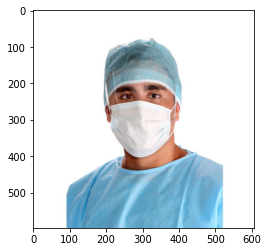

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_3143.jpg')
imgplot = plt.imshow(img)
plt.show()

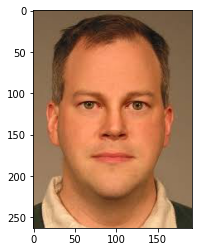

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_2383.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the image
2. Convert the images to numpy arrays

In [15]:
with_mask_path = "/content/data/with_mask/"
data = []

for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

**Train Test Split**

In [17]:
X = np.array(data)
Y = np.array(labels)

In [18]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [20]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape)

(7553, 128, 128, 3) (7553,) (6042, 128, 128, 3) (6042,)


In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a CNN Model**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3),  activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),  activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 13s 20ms/step - loss: 0.4526 - acc: 0.7907 - val_loss: 0.2799 - val_acc: 0.8810
Epoch 2/10
170/170 [==============================] - 2s 14ms/step - loss: 0.2850 - acc: 0.8836 - val_loss: 0.2309 - val_acc: 0.9074
Epoch 3/10
170/170 [==============================] - 3s 16ms/step - loss: 0.2517 - acc: 0.9018 - val_loss: 0.2345 - val_acc: 0.9074
Epoch 4/10
170/170 [==============================] - 2s 14ms/step - loss: 0.2027 - acc: 0.9185 - val_loss: 0.2651 - val_acc: 0.9058
Epoch 5/10
170/170 [==============================] - 2s 14ms/step - loss: 0.1780 - acc: 0.9279 - val_loss: 0.2643 - val_acc: 0.9140
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1547 - acc: 0.9388 - val_loss: 0.2160 - val_acc: 0.9223
Epoch 7/10
170/170 [==============================] - 3s 15ms/step - loss: 0.1182 - acc: 0.9524 - val_loss: 0.2940 - val_acc: 0.9223
Epoch 8/10
170/170 [==============================] - 2s 14ms/step -

**Model Accuracy**

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy: ', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2498 - acc: 0.9292
Test Accuracy:  0.9291859865188599


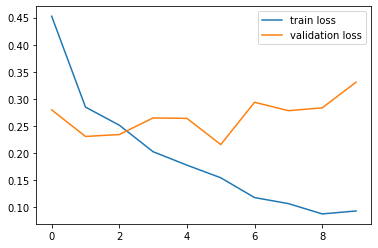

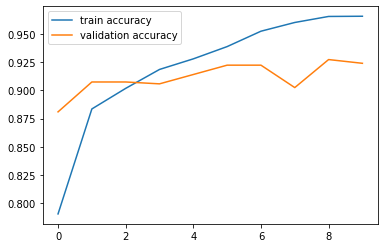

In [27]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictions**

Path of the image to be predicted: /content/data/with_mask/with_mask_3143.jpg


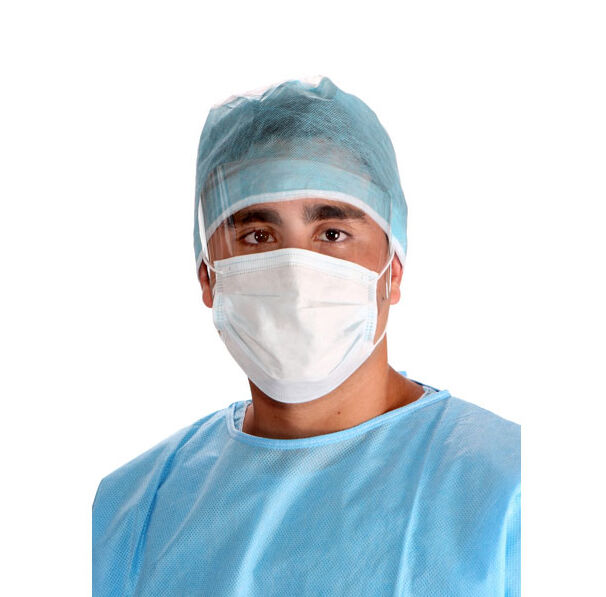

1/1 [==============================] - 0s 155ms/step
[[0.09350999 0.95684856]]
1
The person in the image is wearing a mask


In [29]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
